# EDA ON RETAIL SALES DATA
This Dataset contain Retail Sales Data with Transaction ID, Date of transaction,Customer ID,Quantity ,Price per Unit and the Total Amount .In this datset we need to perform EDA to gain meaningful insights.

In [16]:
#Importing the necessary libraries to perform EDA on the following dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [17]:
df=pd.read_csv("C:/Users/sahak/Downloads/internship/retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


As information shows that the dataset contain no null values so we will check some other  to clean the dataset.

In [20]:
#Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe(include='all',datetime_is_numeric=True))  

Descriptive Statistics:
        Transaction ID        Date Customer ID  Gender         Age  \
count      1000.000000        1000        1000    1000  1000.00000   
unique             NaN         345        1000       2         NaN   
top                NaN  2023-05-16     CUST001  Female         NaN   
freq               NaN          11           1     510         NaN   
mean        500.500000         NaN         NaN     NaN    41.39200   
std         288.819436         NaN         NaN     NaN    13.68143   
min           1.000000         NaN         NaN     NaN    18.00000   
25%         250.750000         NaN         NaN     NaN    29.00000   
50%         500.500000         NaN         NaN     NaN    42.00000   
75%         750.250000         NaN         NaN     NaN    53.00000   
max        1000.000000         NaN         NaN     NaN    64.00000   

       Product Category     Quantity  Price per Unit  Total Amount  
count              1000  1000.000000     1000.000000   1000.000000

In [21]:
#No. of male and female category
Gender=df['Gender'].value_counts()
Gender



Female    510
Male      490
Name: Gender, dtype: int64

In [22]:
#No. of product category
Product_Category=df['Product Category'].value_counts()
Product_Category

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Adjust format based on your actual data
df['Date']

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

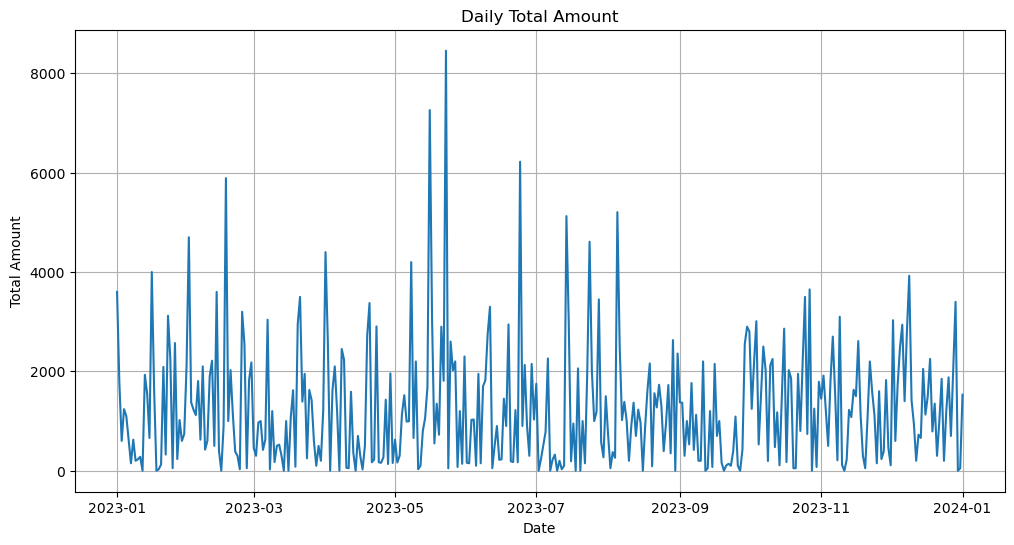

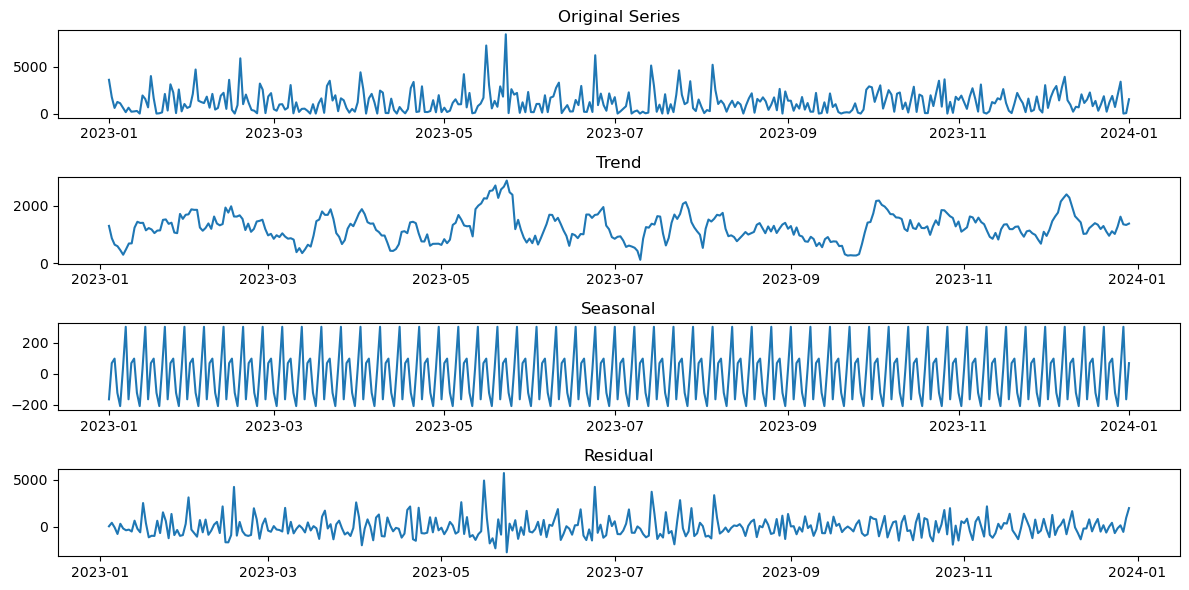

In [24]:
daily_data = df.set_index('Date').resample('D')['Total Amount'].sum()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(daily_data)
plt.title('Daily Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Time series decomposition 
decomposition = seasonal_decompose(daily_data, model='additive', period=7)  
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(daily_data)
plt.title('Original Series')

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Residual')

plt.tight_layout()
plt.show()


In [27]:
customer_summary = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum',
    'Price per Unit': 'mean'
})
customer_summary


,Total Amount,Quantity,Price per Unit
Customer ID,,,
CUST001,150,3,50.0
CUST002,1000,2,500.0
CUST003,30,1,30.0
CUST004,500,1,500.0
CUST005,100,2,50.0
...,...,...,...
CUST995,30,1,30.0
CUST996,50,1,50.0
CUST997,90,3,30.0


C:\Users\sahak\OneDrive\Desktop\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


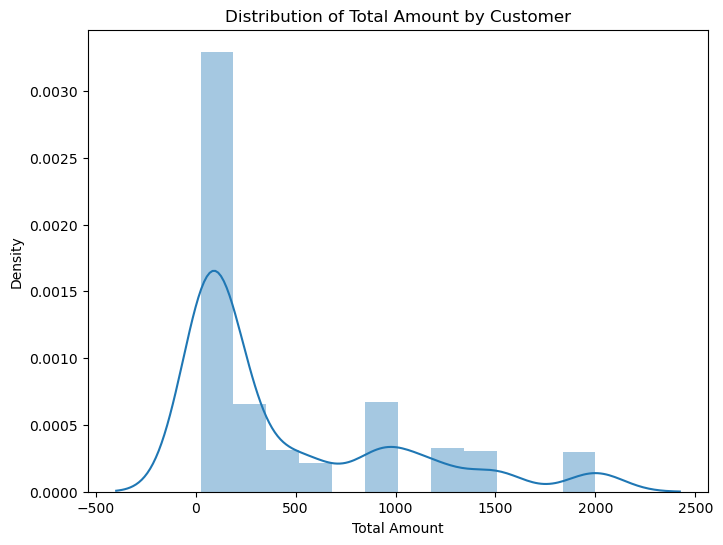

In [28]:
plt.figure(figsize=(8, 6))
sns.distplot(customer_summary['Total Amount'])
plt.xlabel('Total Amount')
plt.ylabel('Density')
plt.title('Distribution of Total Amount by Customer')
plt.show()

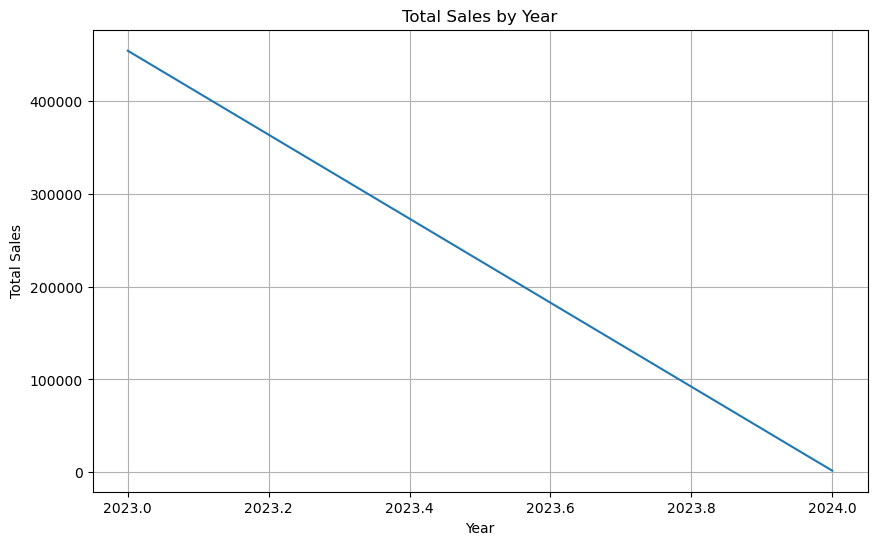

In [16]:
# Total sales per year
total_sales_per_year = df.groupby('year')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_sales_per_year.index, total_sales_per_year.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.grid(True)
plt.show()

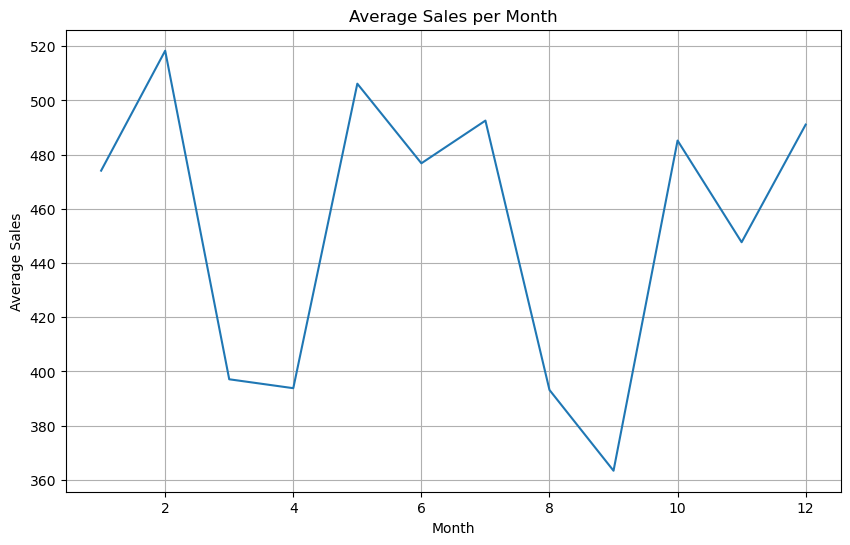

In [17]:
#Average sales per month
avg_sales_per_month = df.groupby('month')['Total Amount'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_sales_per_month.index, avg_sales_per_month.values)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Month')
plt.grid(True)
plt.show()

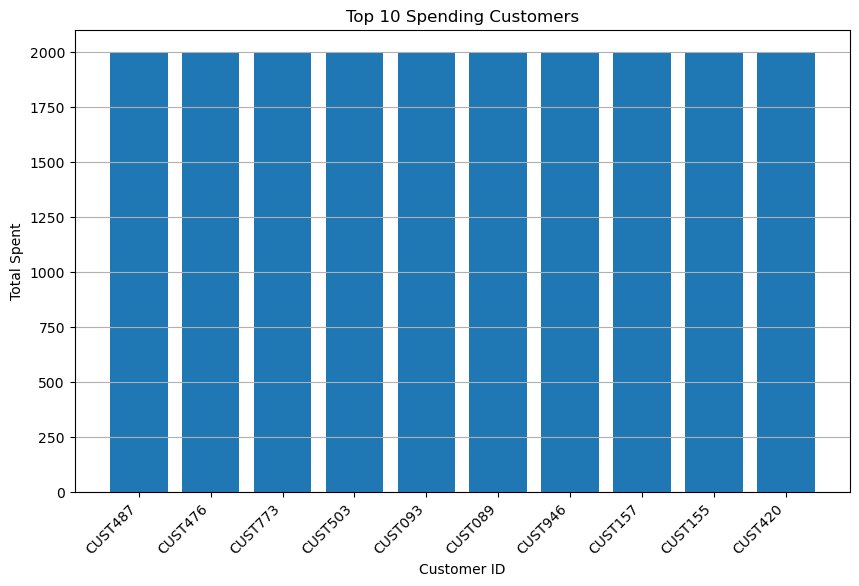

In [18]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_customers.index, top_customers.values)
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.title('Top 10 Spending Customers')
plt.xticks(rotation=45, ha='right')  # Rotate customer ID labels for readability
plt.grid(axis='y')
plt.show()

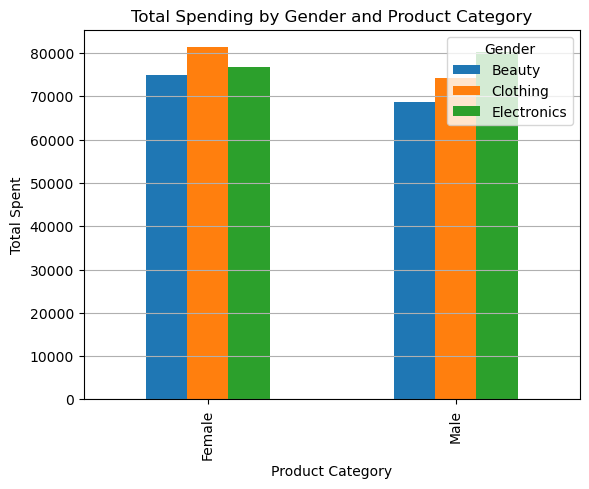

In [19]:
gender_spending_groups = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
gender_spending_groups.plot(kind='bar', stacked=False)
plt.xlabel('Product Category')
plt.ylabel('Total Spent')
plt.title('Total Spending by Gender and Product Category')
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()  # Consider boxplots or violin plots for detailed comparisons


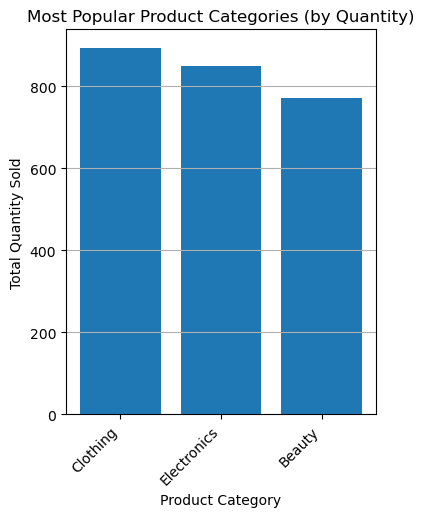

In [32]:
popular_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(4, 5))
plt.bar(popular_products.index, popular_products.values)
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.title('Most Popular Product Categories (by Quantity)')
plt.xticks(rotation=45, ha='right')  # Rotate product category labels for readability
plt.grid(axis='y')
plt.show()


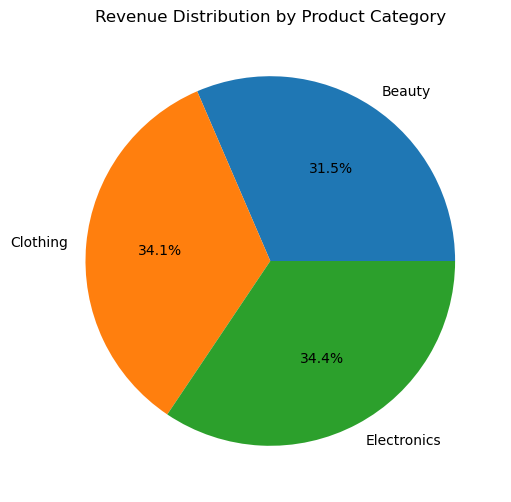

In [21]:
revenue_per_category = df.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
plt.pie(revenue_per_category, labels=revenue_per_category.index, autopct='%1.1f%%')  # Format percentage labels with one decimal place
plt.title('Revenue Distribution by Product Category')
plt.show()


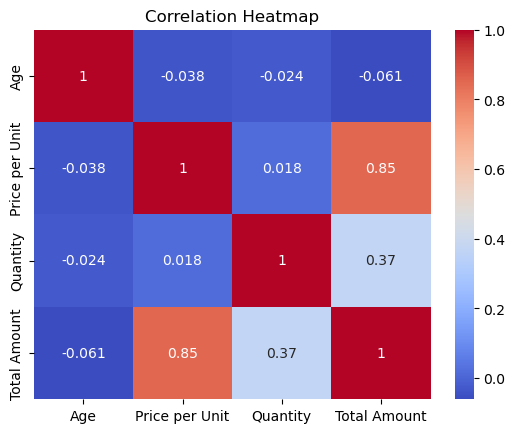

In [35]:
numerical_cols = ['Age', 'Price per Unit', 'Quantity', 'Total Amount']

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Adjust colormap as desired
plt.title('Correlation Heatmap')
plt.show()